# Tutorial 4 - PCA - Answers

## Contents

1. Answers: PCA with Python
    * Importation and preparation of the dataset 
    * Standardization  
    * Calculation of the covariance matrix   
    * Calculation of the eigenvectors and eigenvalues
    * Determining the most important principal component 
    * Calculation of the explained or overall variance
    * Cumulative plot of the principal components and scree plot
    * Reducing the dimensions 
    * Plotting the data
    * Interpretation of the data

<div class="alert alert-info" role="alert" style="height:10px;padding:0px;margin-bottom:-20px"></div>

## 1. Answers: PCA with Python 

<div class="alert alert-info" role="alert" style="height:10px;padding:0px;margin-top:5px;"></div>

### 1.1 Importation and preparation of the dataset. 

The codes in this section are already given in the tutorial.

In [75]:
from sklearn.datasets import load_breast_cancer
load_breast_cancer

<function sklearn.datasets.base.load_breast_cancer>

In [76]:
breast_data = load_breast_cancer().data

In [77]:
breast_labels = load_breast_cancer().target

In [78]:
features = load_breast_cancer().feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [79]:
import numpy as np
import pandas as pd

In [80]:
labels = np.reshape(breast_labels,(569,1))

In [81]:
final_breast_data = np.concatenate([breast_data,labels], axis=1)
final_breast_data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          4.60100000e-01,   1.18900000e-01,   0.00000000e+00],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          2.75000000e-01,   8.90200000e-02,   0.00000000e+00],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          3.61300000e-01,   8.75800000e-02,   0.00000000e+00],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          2.21800000e-01,   7.82000000e-02,   0.00000000e+00],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          4.08700000e-01,   1.24000000e-01,   0.00000000e+00],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          2.87100000e-01,   7.03900000e-02,   1.00000000e+00]])

In [82]:
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [83]:
features_labels = np.append(features,'label')

In [84]:
breast_dataset.columns = features_labels

In [85]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [86]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


### 1.2 Standarization 


### Excercise 1.2.1
Use the command code StandardScaler and fit_transform to write a code that can calculate the standardization of the whole data, except the colomn 'lable'.

In [87]:
#Excercise 1.2.1
from sklearn.preprocessing import StandardScaler

# code to get the values of all features
breast_cancer_dataset = breast_dataset.loc[:, features].values 
#the data expect the data of the labels.
breast_cancer_dataset = StandardScaler().fit_transform(breast_cancer_dataset) # normalizing the features 
breast_cancer_dataset

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Excercise 1.2.2

Check whether the normalized data has a mean of zero and a standard deviation of one. This is possible with numpy which is already imported in the previous section. 

In [88]:
#Excercise 1.2.2
np.mean(breast_cancer_dataset),np.std(breast_cancer_dataset)

(-6.8265382931843257e-17, 1.0)

### Excercise 1.2.3

Write below a code that shows the new data table with the normalized values. Call this new dataset ```normalized_breast_cancer_dataset```. Give the columns the correspondig feature names.

In [89]:
#Excercise 1.2.3
normalized_breast_cancer_dataset = pd.DataFrame(breast_cancer_dataset,columns=features)
normalized_breast_cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 1.3 Calculation of the covariance matrix

### Excercise 1.3.1

Calculate the Covariance-matrix using the command ``cov`` 

In [90]:
#Excercise 1.3.1
cov_mat_breast_cancer_dataset = np.cov(normalized_breast_cancer_dataset.T) 
cov_mat_breast_cancer_dataset
#print('NumPy covariance matrix: \n%s' %np.cov(X.T))

array([[  1.00176056e+00,   3.24351929e-01,   9.99612069e-01,
          9.89095475e-01,   1.70881506e-01,   5.07014640e-01,
          6.77955036e-01,   8.23976636e-01,   1.48001350e-01,
         -3.12179472e-01,   6.80285970e-01,  -9.74887767e-02,
          6.75358538e-01,   7.37159198e-01,  -2.22992026e-01,
          2.06362656e-01,   1.94545531e-01,   3.76831225e-01,
         -1.04504545e-01,  -4.27163418e-02,   9.71245907e-01,
          2.97530545e-01,   9.66835698e-01,   9.42739295e-01,
          1.19826732e-01,   4.14190751e-01,   5.27839123e-01,
          7.45524434e-01,   1.64241985e-01,   7.07832563e-03],
       [  3.24351929e-01,   1.00176056e+00,   3.30113223e-01,
          3.21650988e-01,  -2.34296930e-02,   2.37118951e-01,
          3.02950254e-01,   2.93980713e-01,   7.15266864e-02,
         -7.65717560e-02,   2.76354360e-01,   3.87037830e-01,
          2.82169018e-01,   2.60302460e-01,   6.62542133e-03,
          1.92312595e-01,   1.43545353e-01,   1.64139495e-01,
       

### 1.4 Calculation of the Eigenvalues and Eigenvectoren

### Excercise 1.4.1

Calculate the Eigenvalues and Eigenvectoren. Call them ```eig_vals_breast_cancer_dataset``` and ```eig_vecs_breast_cancer_dataset```. Hint: use the linear algebra tutorial.

In [91]:
#Excercise 1.4.1
eig_vals_breast_cancer_dataset, eig_vecs_breast_cancer_dataset = np.linalg.eig(cov_mat_breast_cancer_dataset)

eig_vecs_breast_cancer_dataset

array([[  2.18902444e-01,  -2.33857132e-01,  -8.53124284e-03,
          4.14089623e-02,  -3.77863538e-02,   1.87407904e-02,
          1.24088340e-01,   7.45229622e-03,  -2.23109764e-01,
          9.54864432e-02,   4.14714866e-02,   5.10674568e-02,
          1.19672116e-02,  -5.95061348e-02,   5.11187749e-02,
         -1.50583883e-01,   2.02924255e-01,   1.46712338e-01,
          2.25384659e-01,   7.02414091e-01,  -2.11460455e-01,
          2.11194013e-01,   1.31526670e-01,  -1.29476396e-01,
         -1.92264989e-02,   1.82579441e-01,  -9.85526942e-02,
          7.29289034e-02,   4.96986642e-02,   6.85700057e-02],
       [  1.03724578e-01,  -5.97060883e-02,   6.45499033e-02,
         -6.03050001e-01,   4.94688505e-02,  -3.21788366e-02,
         -1.13995382e-02,  -1.30674825e-01,   1.12699390e-01,
          2.40934066e-01,  -3.02243402e-01,   2.54896423e-01,
          2.03461333e-01,   2.15600995e-02,   1.07922421e-01,
         -1.57841960e-01,  -3.87061187e-02,  -4.11029851e-02,
       

### 1.5 Determining the most important principal component  

### Ecercise 1.5.1

Make a eig_pairs list of (eigenvalue, eigenvector) tulples and print the Eigenvalues in descending order.

In [92]:
#Excercise 1.5.1
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
#eig_pairs.sort(key=lambda x: x[0], reverse=True)
# or
eig_pairs.sort() # python
eig_pairs.reverse() # python


# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

13.3049907944
5.70137460373
2.82291015501
1.98412751773
1.65163324233
1.2094822398
0.676408881701
0.47745625469
0.417628782108
0.351310874882
0.294433153491
0.261621161366
0.241782421328
0.157286149218
0.0943006956011
0.0800034044774
0.0595036135304
0.0527114222101
0.049564700213
0.0312142605531
0.0300256630904
0.0274877113389
0.0243836913546
0.0180867939843
0.0155085271344
0.00819203711761
0.00691261257918
0.0015921360012
0.000750121412719
0.000133279056664


### 1.6 Calculation of the explained variance or overall variance

### Excercise 1.6.1

Calculate the totale variance of the eigenvalues. In other words, sum the eigevalues. Use the function ```sum(name of list)```.

In [93]:
#Excercise 1.6.1
sum_eigvals_breast_cancer_dataset = sum(eig_vals_breast_cancer_dataset)
sum_eigvals_breast_cancer_dataset

30.052816901408473

### Excercise 1.6.2

Calculate the explained variance. You can do that with the following formula: (i/x)*100. i stands for a eigenvalues from the descending sorted eigvalue list (```eigvals_breast_cancer_dataset```). x stands for the totale variance of the eigenvalues. Call the explained variance ```var_exp_breast_cancer_dataset```. 

In [94]:
#Excercise 1.6.2
var_exp_breast_cancer_dataset =[]
for i in sorted(eig_vals_breast_cancer_dataset, reverse=True):
    var_exp_breast_cancer_dataset.append((i/tot)*100)
var_exp_breast_cancer_dataset

[44.272025607526409,
 18.971182044033103,
 9.3931632574313806,
 6.6021349154701658,
 5.4957684923462677,
 4.0245220398833439,
 2.2507337129825054,
 1.5887238000213273,
 1.3896493745591156,
 1.1689781894131497,
 0.9797189875980179,
 0.87053790073788306,
 0.80452498719673216,
 0.52336574549263581,
 0.3137832167627404,
 0.26620933651523321,
 0.19799679253242769,
 0.17539594502263584,
 0.16492530592251614,
 0.10386467483387103,
 0.099909646370025834,
 0.091464675105434212,
 0.081136125889910829,
 0.060183356667167148,
 0.051604237916518858,
 0.027258799547748867,
 0.02300154625059616,
 0.0052977929038083779,
 0.002496010324688627,
 0.00044348274273728588]

### Excercise 1.6.3

Calculate the cummulative explained variance. This list can be formed with the command .cumsum() and numpy. Call the list ```cum_var_exp_breast_cancer_dataset```

In [95]:
#Excercise 1.6.3
cum_var_exp_breast_cancer_dataset = np.cumsum(var_exp_breast_cancer_dataset)
cum_var_exp_breast_cancer_dataset

array([  44.27202561,   63.24320765,   72.63637091,   79.23850582,
         84.73427432,   88.75879636,   91.00953007,   92.59825387,
         93.98790324,   95.15688143,   96.13660042,   97.00713832,
         97.81166331,   98.33502905,   98.64881227,   98.91502161,
         99.1130184 ,   99.28841435,   99.45333965,   99.55720433,
         99.65711397,   99.74857865,   99.82971477,   99.88989813,
         99.94150237,   99.96876117,   99.99176271,   99.99706051,
         99.99955652,  100.        ])

### 1.7 Cummulative plot of the principal components and scree plot.

### Excercise 1.7.1

Make in one plot a **bar graph** of the individual explained variance and a **step graph** of the cumulative explained variance.

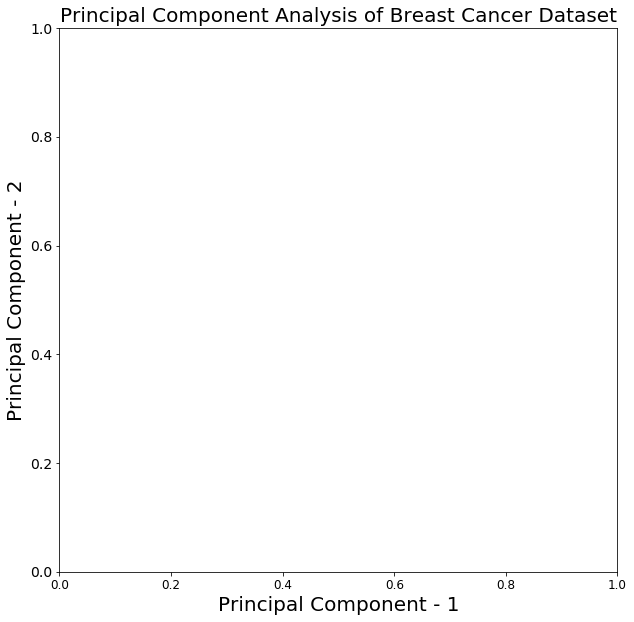

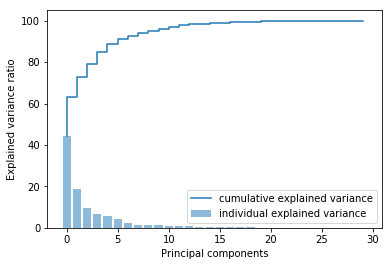

In [96]:
#Excercise 1.7.1
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(range(len(eig_vecs_breast_cancer_dataset)), var_exp_breast_cancer_dataset, alpha=0.5,
         label='individual explained variance')
plt.step(range(len(eig_vecs_breast_cancer_dataset)), cum_var_exp_breast_cancer_dataset,
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

### Excercise 1.7.2

Make a scree plot. 

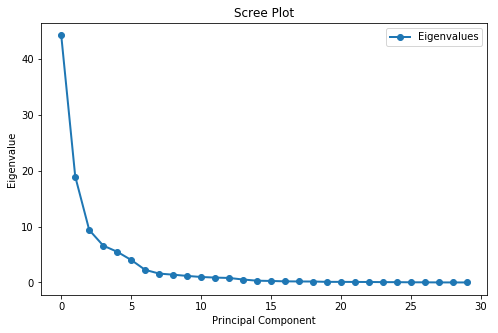

In [97]:
#Excercise 1.7.2
fig = plt.figure(figsize=(8,5))
plt.plot(var_exp, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
 
leg = plt.legend(['Eigenvalues'])
plt.show()

### 1.8 Reducing the dimensions


### Excercise 1.8.1

Reshape the eig_pair data in matrix_w with only the Eigenvectors of the two highest eigenvalues. *hint: use hstack*

In [98]:
#Excercise 1.8.1
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]


### Excercise 1.8.2


Calculate the inner product of ```normalized_breast_cancer_dataset``` and ```matrix_w``` and name it ```new_subspace```

In [102]:
#Excercise 1.8.2
new_subspace = breast_cancer_dataset.dot(matrix_w)
new_subspace

array([[  9.19283683,   1.94858307],
       [  2.3878018 ,  -3.76817174],
       [  5.73389628,  -1.0751738 ],
       ..., 
       [  1.25617928,  -1.90229671],
       [ 10.37479406,   1.67201011],
       [ -5.4752433 ,  -0.67063679]])

### 1.9 Plotting the data 

### Excercise 1.9.1

Make a scatter plot that display the data of bennign in red and maligant in green with the plottitle *Principal Component Analysis of Breast Cancer Dataset*,<br> x axis Principal Component 1, y axis Principal Component 2 and legend.

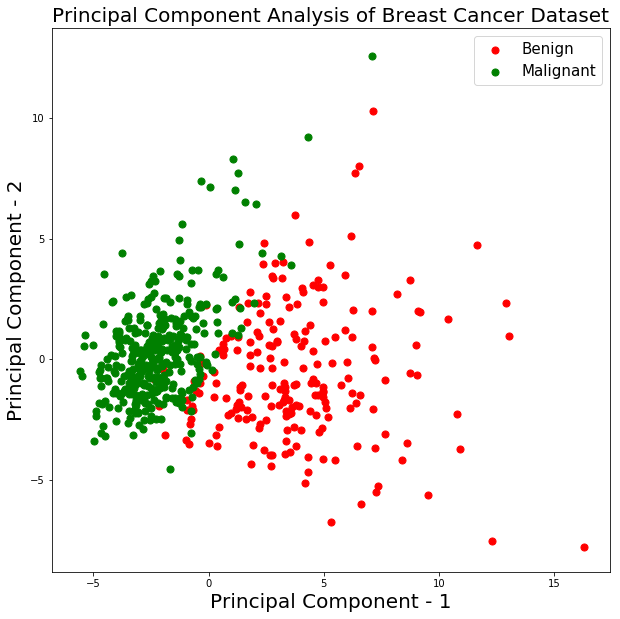

In [107]:
#Excercise 1.9.1
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(new_subspace[indicesToKeep,0]
               , new_subspace[indicesToKeep,1], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

### 1.10 Interpretation of the data

### Excercise 1.10.1

Give a interpretation of the data that is present in the scatter plot in exercise 11.

Answer excercise 1.10.1: The clusters are different based on PC1. The loading plot was not possible so it is unclear which variables have influenced this differences. Furthmore, the malignant cells show less spread than the benign cells. So, the variables of the malignant cells have more similar values than the benign cell values.